# Introduction
This project focuses on analyzing and predicting house prices and related data in India using machine learning and deep learning techniques. The goal is to develop models that can accurately predict house prices based on various features such as location, size, and amenities. This project will also explore the data through visualization and identify outliers to ensure the accuracy and reliability of the models.

<font color = 'green'>
Content:
    
1. [Data Loading and Checking](#1)
    * [Data Description](#2)
    * [Bringing values ​​up to required standards](#3)
    * [Detection Outlier](#4)
1. [Data Visualiton](#5)
1. [Data Filling](#6)
1. [Encoding and Scaling for ML and DL](#7)
1. [Machine Learning and Deep Learning Methods](#8)
    
    
    



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices/house_prices.csv


<a id ="1"></a>
# Data Loading and Checking

In [2]:
data = pd.read_csv("/kaggle/input/house-prices/house_prices.csv")

In [3]:
data.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [5]:
data.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

In [6]:
data['Amount(in rupees)'].value_counts()

Amount(in rupees)
Call for Price    9684
85 Lac            5264
65 Lac            4229
60 Lac            3869
70 Lac            3801
                  ... 
21.60 Cr             1
21.45 Cr             1
9.45 Cr              1
13.6 Lac             1
9.90 Cr              1
Name: count, Length: 1561, dtype: int64

<a id ="2"></a>
# Data Description

1. Index: Unique identifier for each record.

1. Title: Title or name associated with the record.

1. Description: Brief description of the record.

1. Amount (in rupees): The monetary amount specified in rupees.

1. Price (in rupees): The price specified in rupees.

1. Location: The geographical location associated with the record.

1. Carpet Area: The usable floor area within the property.

1. Status: The current status of the property or record.

1. Floor: The floor number where the property is located.

1. Transaction: The type of transaction related to the record.

1. Furnishing: The furnishing status of the property (e.g., furnished, unfurnished).

1. Facing: The direction the property is facing.

1. Overlooking: The view from the property.

1. Society: The society or community in which the property is located.

1. Bathroom: The number of bathrooms in the property.

1. Balcony: The number of balconies in the property.

1. Car Parking: The availability of car parking spaces.

1. Ownership: The ownership status of the property.

1. Super Area: The total area of the property, including common areas.

1. Dimensions: The dimensions of the property (currently not available).

1. Plot Area: The area of the plot (currently not available).

<a id ="3"></a>
## Bringing values ​​up to required standards

In [7]:
def convert_to_rupees(amount):
    try:
        if 'Lac' in amount:
            return float(amount.replace(" Lac","").replace(",","")) *100000
        elif 'Cr' in amount:
            return float(amount.replace(" Cr","").replace(",",""))* 10000000
        else:
            return float(amount.replace(",",""))
    except:
        return None


In [8]:
def convert_to_rupees2(amount):
    try:
        if isinstance(amount, str):
            if 'Lac' in amount:
                return float(amount.replace(' Lac', '').replace(',', '')) * 100000
            elif 'Cr' in amount:
                return float(amount.replace(' Cr', '').replace(',', '')) * 10000000
            else:
                return float(amount.replace(',', ''))
        elif isinstance(amount, int):
            return float(amount)
        elif isinstance(amount, float):
            return amount      # Eğer amount zaten sayısalsa, doğrudan döndür
        else:
            return None
    except ValueError:
        return None



In [9]:
def convert_to_dollars(rupees, exchange_rate=83.47):
    if rupees is not None:
        return rupees / exchange_rate
    else:
        return None

In [10]:
data['Amount(in rupees)'] = data['Amount(in rupees)'].apply(convert_to_rupees) # burada Cr ve Lac gibi değerleri rupiye çeviriyor(hindistan adet birimi)
data['Amount(in rupees)'] = data['Amount(in rupees)'].apply(convert_to_dollars) #rupileri dolara çeviriyoruz
data['Price (in rupees)'] = data['Price (in rupees)'].apply(convert_to_dollars) 

In [11]:
data.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",50317.479334,71.882113,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,117407.451779,165.316880,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,167724.931113,209.656164,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,29950.880556,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",191685.635558,225.518150,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [12]:
data.rename(columns = {'Amount(in rupees)':'Amount'},inplace=True)
data.rename(columns = {"Price (in rupees)":"Price"},inplace=True)

In [13]:
data["Carpet Area"].value_counts() #10.76

Carpet Area
1000 sqft    5285
900 sqft     4649
1300 sqft    3457
1600 sqft    2752
600 sqft     2225
             ... 
1867 sqft       1
2415 sqft       1
1712 sqft       1
2404 sqft       1
136 sqft        1
Name: count, Length: 2758, dtype: int64

In [14]:
def sqft_to_m2(Carpet_Area):
    try:
        if isinstance(Carpet_Area, str) and "sqft" in Carpet_Area:
            return float(Carpet_Area.replace(" sqft", "").replace(",", "")) * 10.76
        elif isinstance(Carpet_Area, (int, float)):
            return float(Carpet_Area * 10.76)
        
    except ValueError:
        return None
# isinstance değerin türünü kontrol eder eğer kontrol ettiği şey oysa 1 döndürür yoksa hayır

In [15]:
data["Carpet Area"] = data["Carpet Area"].apply(sqft_to_m2)

In [16]:
data["Floor"].value_counts()

Floor
2 out of 4      12433
1 out of 4      11985
3 out of 4       8792
1 out of 3       7093
4 out of 4       6253
                ...  
30 out of 51        1
29 out of 33        1
19 out of 52        1
14 out of 42        1
7 out of 70         1
Name: count, Length: 947, dtype: int64

In [17]:
extracted = data['Floor'].str.extract(r'(\d+) out of (\d+)', expand=True)
data['Kat'] = extracted[0]
data['Toplam_Kat_Sayisi'] = extracted[1]

In [18]:
data.info()
del(data["Floor"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount             177847 non-null  float64
 4   Price              169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        100428 non-null  float64
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [19]:
data["Super Area"].value_counts()

Super Area
1100 sqft    2599
1332 sqft    2111
1500 sqft    2018
500 sqft     1665
1000 sqft    1352
             ... 
181 sqft        1
137 sqft        1
2831 sqft       1
597 sqft        1
2332 sqft       1
Name: count, Length: 2976, dtype: int64

In [20]:
data["Super Area"] = data["Super Area"].apply(sqft_to_m2)

In [21]:
data['Bathroom'] = pd.to_numeric(data['Bathroom'].replace('> 10','11'))
data['Balcony'] = pd.to_numeric(data['Balcony'].replace('> 10','11') )

In [22]:
data['Car Parking'] = data['Car Parking'].astype(str)
data['covered'] = data['Car Parking'].apply(lambda x: 1 if 'Covered' in x else 0)
data['parking_capacity'] = data['Car Parking'].str.extract(r'(\d+)', expand=False).fillna(0).astype(int)

In [23]:
data.drop("Car Parking",axis=1,inplace =True)

In [24]:
data.Transaction.value_counts()

Transaction
Resale          144172
New Property     42565
Other              709
Rent/Lease           2
Name: count, dtype: int64

In [25]:
index_to_drop = data[data['Transaction'] == 'Rent/Lease'].index
data = data.drop(index_to_drop)
# data = data[data['Transaction'] != 'Rent/Lease']

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187529 entries, 0 to 187530
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187529 non-null  int64  
 1   Title              187529 non-null  object 
 2   Description        184506 non-null  object 
 3   Amount             177845 non-null  float64
 4   Price              169864 non-null  float64
 5   location           187529 non-null  object 
 6   Carpet Area        100427 non-null  float64
 7   Status             186916 non-null  object 
 8   Transaction        187446 non-null  object 
 9   Furnishing         184632 non-null  object 
 10  facing             117296 non-null  object 
 11  overlooking        106093 non-null  object 
 12  Society            77853 non-null   object 
 13  Bathroom           186701 non-null  float64
 14  Balcony            138595 non-null  float64
 15  Ownership          122012 non-null  object 
 16  Super A

In [27]:
data.rename(columns = {"covered":"parking_covered"},inplace=True)

In [28]:
data.drop(["Index","Title","Description","Status","overlooking","Society","Dimensions","Plot Area"],axis=1,inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187529 entries, 0 to 187530
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount             177845 non-null  float64
 1   Price              169864 non-null  float64
 2   location           187529 non-null  object 
 3   Carpet Area        100427 non-null  float64
 4   Transaction        187446 non-null  object 
 5   Furnishing         184632 non-null  object 
 6   facing             117296 non-null  object 
 7   Bathroom           186701 non-null  float64
 8   Balcony            138595 non-null  float64
 9   Ownership          122012 non-null  object 
 10  Super Area         75405 non-null   float64
 11  Kat                167692 non-null  object 
 12  Toplam_Kat_Sayisi  167692 non-null  object 
 13  parking_covered    187529 non-null  int64  
 14  parking_capacity   187529 non-null  int64  
dtypes: float64(6), int64(2), object(7)
memory usage: 22.9+ M

In [29]:
data['Kat'] = data['Kat'].astype(float)
data['Toplam_Kat_Sayisi'] = data['Toplam_Kat_Sayisi'].astype(float)



In [30]:
data['parking_covered'] = data['parking_covered'].astype(bool)

In [31]:
cleanead_data = data.copy()
cleanead_data.to_csv('cleaned_data.csv', index=False)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187529 entries, 0 to 187530
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount             177845 non-null  float64
 1   Price              169864 non-null  float64
 2   location           187529 non-null  object 
 3   Carpet Area        100427 non-null  float64
 4   Transaction        187446 non-null  object 
 5   Furnishing         184632 non-null  object 
 6   facing             117296 non-null  object 
 7   Bathroom           186701 non-null  float64
 8   Balcony            138595 non-null  float64
 9   Ownership          122012 non-null  object 
 10  Super Area         75405 non-null   float64
 11  Kat                167692 non-null  float64
 12  Toplam_Kat_Sayisi  167692 non-null  float64
 13  parking_covered    187529 non-null  bool   
 14  parking_capacity   187529 non-null  int64  
dtypes: bool(1), float64(8), int64(1), object(5)
memory usage

In [33]:
data.head(60)

,Amount,Price,location,Carpet Area,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Super Area,Kat,Toplam_Kat_Sayisi,parking_covered,parking_capacity
0,50317.479334,71.882113,thane,5380.00,Resale,Unfurnished,NaN,1.0,2.0,NaN,NaN,10.0,11.0,False,0
1,117407.451779,165.316880,thane,5089.48,Resale,Semi-Furnished,East,2.0,NaN,Freehold,NaN,3.0,22.0,False,1
2,167724.931113,209.656164,thane,8382.04,Resale,Unfurnished,East,2.0,NaN,Freehold,NaN,10.0,29.0,True,1
3,29950.880556,NaN,thane,5702.80,Resale,Unfurnished,NaN,1.0,1.0,NaN,NaN,1.0,3.0,False,0
4,191685.635558,225.518150,thane,6832.60,Resale,Unfurnished,West,2.0,NaN,Co-operative Society,NaN,20.0,42.0,True,1
5,53911.585001,79.285971,thane,NaN,Resale,Unfurnished,East,1.0,1.0,Co-operative Society,7316.80,2.0,7.0,False,0
6,19767.581167,30.406134,thane,5918.00,Resale,Unfurnished,NaN,1.0,NaN,NaN,NaN,4.0,5.0,False,0
7,71882.113334,125.014975,thane,NaN,Resale,Furnished,NaN,1.0,NaN,NaN,6187.00,NaN,NaN,False,0
8,71882.113334,119.803522,thane,NaN,Resale,Furnished,NaN,1.0,NaN,Co-operative Society,6456.00,NaN,NaN,False,0
9,191685.635558,133.580927,thane,9684.00,Resale,Unfurnished,East,3.0,1.0,Freehold,NaN,3.0,27.0,True,1


In [34]:
data = pd.read_csv("cleaned_data.csv")

<a id ="4"></a>
# Detection Outlier

In [35]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers


In [36]:
category = ["Amount","Price","Carpet Area","Super Area"]
data.loc[detect_outliers(data,category)]

,Amount,Price,location,Carpet Area,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Super Area,Kat,Toplam_Kat_Sayisi,parking_covered,parking_capacity


<a id ="5"></a>
# Data Visulation

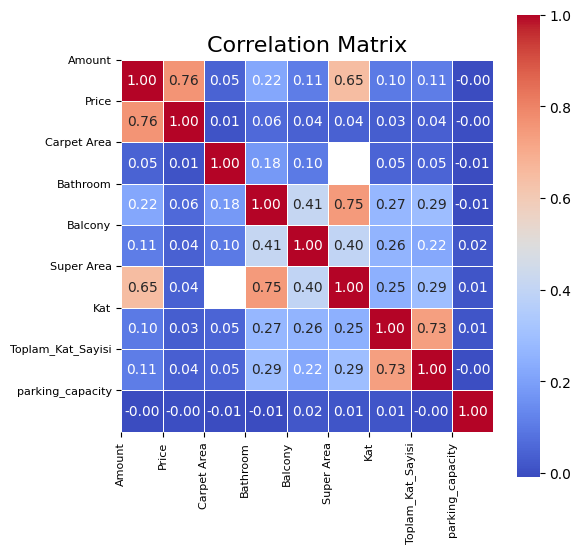

In [37]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

f = plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.7)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8, rotation=90)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [38]:
non_categ_variables = ["Amount","Price","Carpet Area","Super Area","parking_capacity","Kat","Toplam_Kat_Sayisi"]
categ_variables = ['location', 'parking_covered',"Transaction" ,"Furnishing","facing","Bathroom","Balcony","Ownership"] #bar plot

In [39]:
data.columns

Index(['Amount', 'Price', 'location', 'Carpet Area', 'Transaction',
       'Furnishing', 'facing', 'Bathroom', 'Balcony', 'Ownership',
       'Super Area', 'Kat', 'Toplam_Kat_Sayisi', 'parking_covered',
       'parking_capacity'],
      dtype='object')

In [40]:
data

,Amount,Price,location,Carpet Area,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Super Area,Kat,Toplam_Kat_Sayisi,parking_covered,parking_capacity
0,50317.479334,71.882113,thane,5380.00,Resale,Unfurnished,NaN,1.0,2.0,NaN,NaN,10.0,11.0,False,0
1,117407.451779,165.316880,thane,5089.48,Resale,Semi-Furnished,East,2.0,NaN,Freehold,NaN,3.0,22.0,False,1
2,167724.931113,209.656164,thane,8382.04,Resale,Unfurnished,East,2.0,NaN,Freehold,NaN,10.0,29.0,True,1
3,29950.880556,NaN,thane,5702.80,Resale,Unfurnished,NaN,1.0,1.0,NaN,NaN,1.0,3.0,False,0
4,191685.635558,225.518150,thane,6832.60,Resale,Unfurnished,West,2.0,NaN,Co-operative Society,NaN,20.0,42.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187524,75476.219001,38.636636,zirakpur,NaN,New Property,Semi-Furnished,East,3.0,3.0,Freehold,21014.28,2.0,4.0,True,1
187525,65891.937223,39.223673,zirakpur,NaN,Resale,Unfurnished,North - East,3.0,NaN,NaN,18076.80,4.0,6.0,True,1
187526,91050.676890,52.030670,zirakpur,13450.00,Resale,Furnished,East,3.0,2.0,Freehold,NaN,1.0,3.0,True,1
187527,35941.056667,50.688870,zirakpur,NaN,Resale,Semi-Furnished,NaN,2.0,NaN,NaN,7628.84,2.0,2.0,False,0


In [41]:
for i in non_categ_variables:
    for j in categ_variables:
        print(data[[j, i]].groupby([j], as_index=False).mean().sort_values(by=i, ascending=False))
        print("\n\n")

     location         Amount
43     mumbai  401975.820294
23    gurgaon  260029.915154
63   siliguri  216022.997349
54  panchkula  205120.329932
58     raipur  196333.335910
..        ...            ...
5    badlapur   35964.523336
75       vapi   34207.523822
53    palghar   32714.573905
8     bhiwadi   32643.623877
48    navsari   32510.682481

[81 rows x 2 columns]



   parking_covered         Amount
1             True  204067.294214
0            False  103668.216818



    Transaction         Amount
0  New Property  185797.814928
2        Resale  131102.682377
1         Other   57335.784392



       Furnishing         Amount
1  Semi-Furnished  153773.388357
2     Unfurnished  136237.617782
0       Furnished  132135.981199



         facing         Amount
2  North - East  210722.306457
4         South  184268.922952
1         North  158919.474010
0          East  158533.578929
3  North - West  154571.115519
7          West  151378.197156
5  South - East  106346.152403
6   South -

In [42]:
def bar_plot(variable):
    var = data[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    plt.figure(figsize = (12,4))
    sns.barplot(x=data[variable],y=data["Amount"])
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("{} and Amount relation".format(variable))
    plt.show()

    print("{}: \n {}".format(variable,varValue))
    

In [43]:

def plot_hist(variable):
    
    plt.figure(figsize=(5, 3))
    plt.hist(data[variable], bins=50)
    plt.xlabel(variable)
    plt.xticks(rotation=90) 
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()


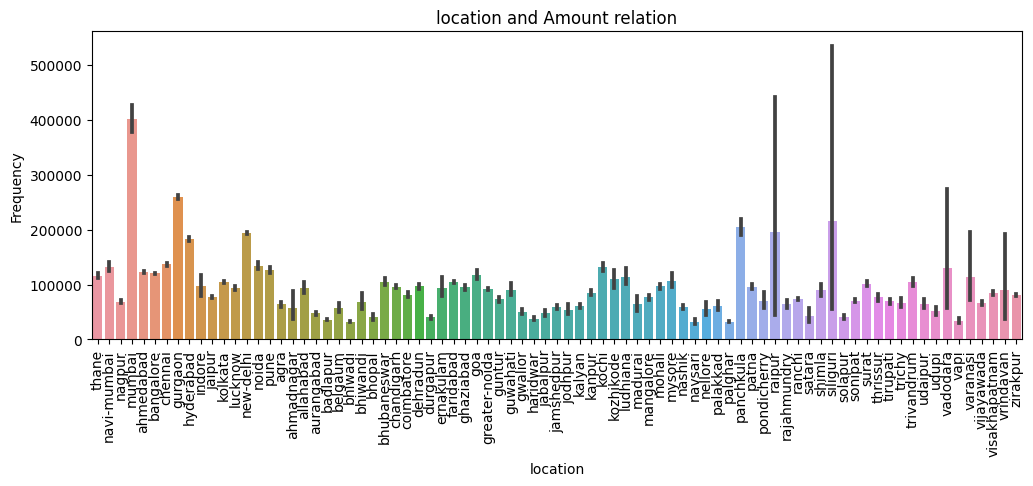

location: 
 location
new-delhi      27599
bangalore      24030
kolkata        22380
gurgaon        20070
ahmedabad      12749
               ...  
nellore           30
solapur           30
madurai           30
palakkad          30
pondicherry       30
Name: count, Length: 81, dtype: int64


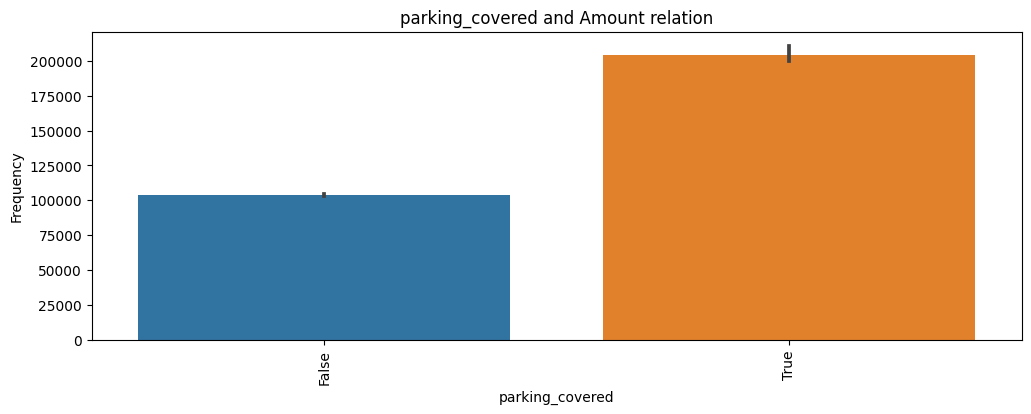

parking_covered: 
 parking_covered
False    114881
True      72648
Name: count, dtype: int64


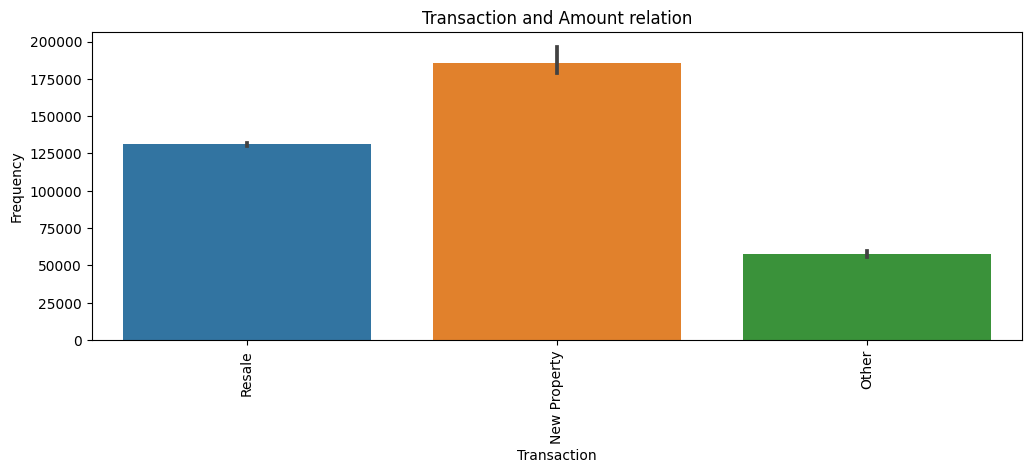

Transaction: 
 Transaction
Resale          144172
New Property     42565
Other              709
Name: count, dtype: int64


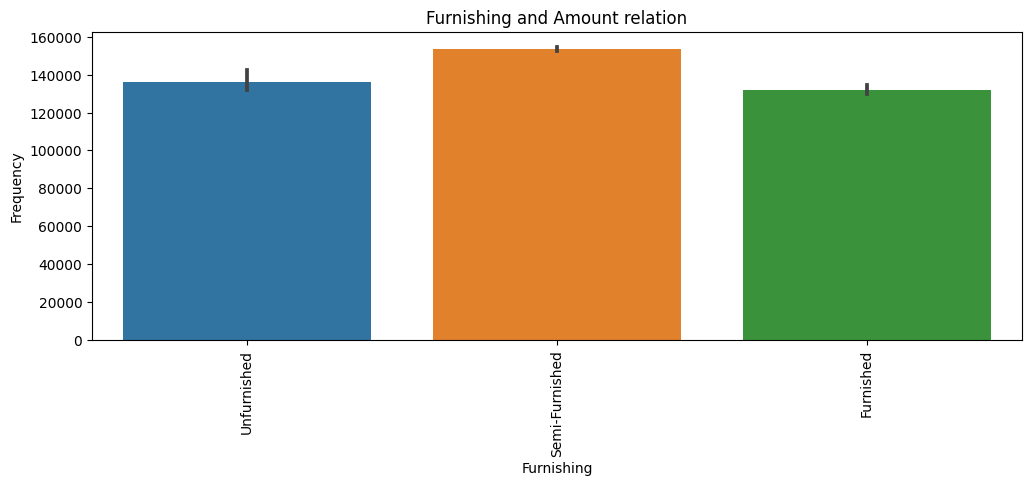

Furnishing: 
 Furnishing
Semi-Furnished    88316
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64


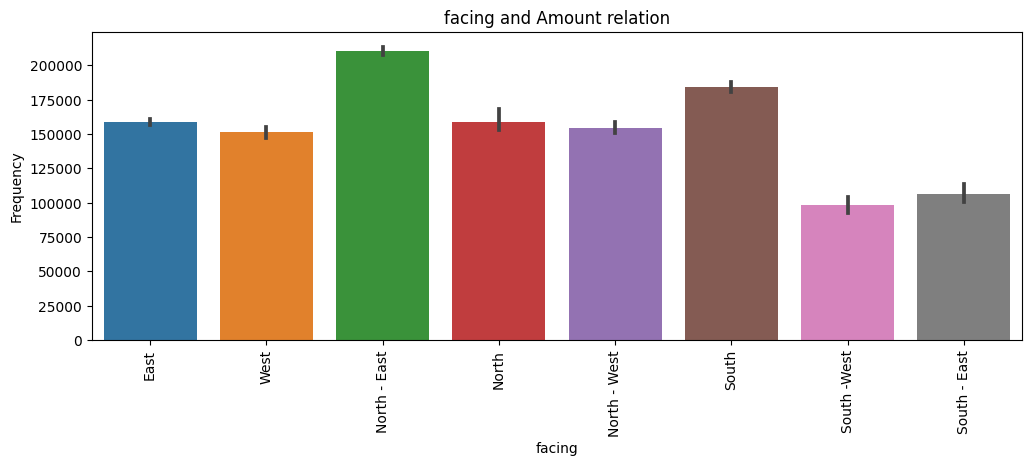

facing: 
 facing
East            54741
North - East    24219
North           16533
West             8574
South            4693
North - West     3843
South - East     2622
South -West      2071
Name: count, dtype: int64


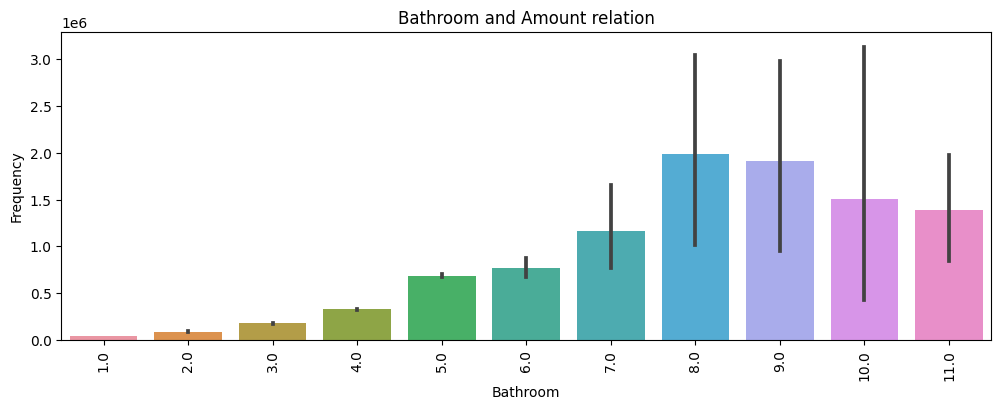

Bathroom: 
 Bathroom
2.0     93006
3.0     55780
1.0     18654
4.0     15600
5.0      3343
6.0       209
11.0       35
7.0        35
10.0       14
8.0        14
9.0        11
Name: count, dtype: int64


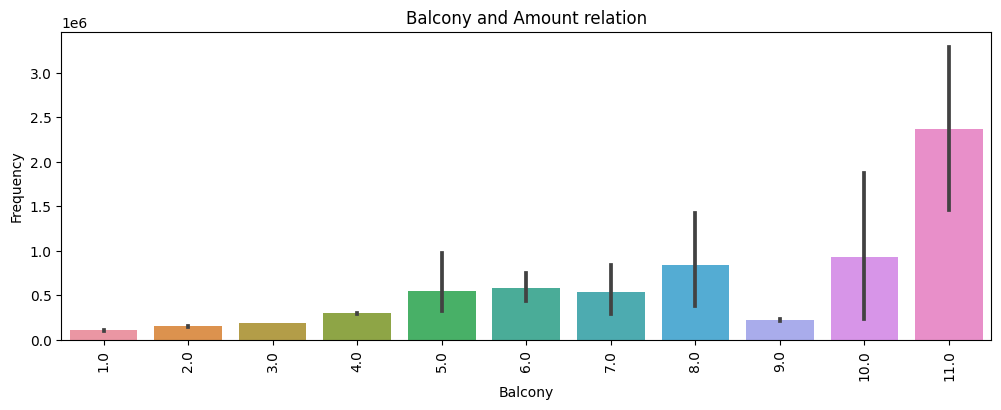

Balcony: 
 Balcony
2.0     51809
1.0     49218
3.0     27111
4.0      9420
5.0       841
6.0       132
11.0       22
7.0        14
10.0       13
8.0        13
9.0         2
Name: count, dtype: int64


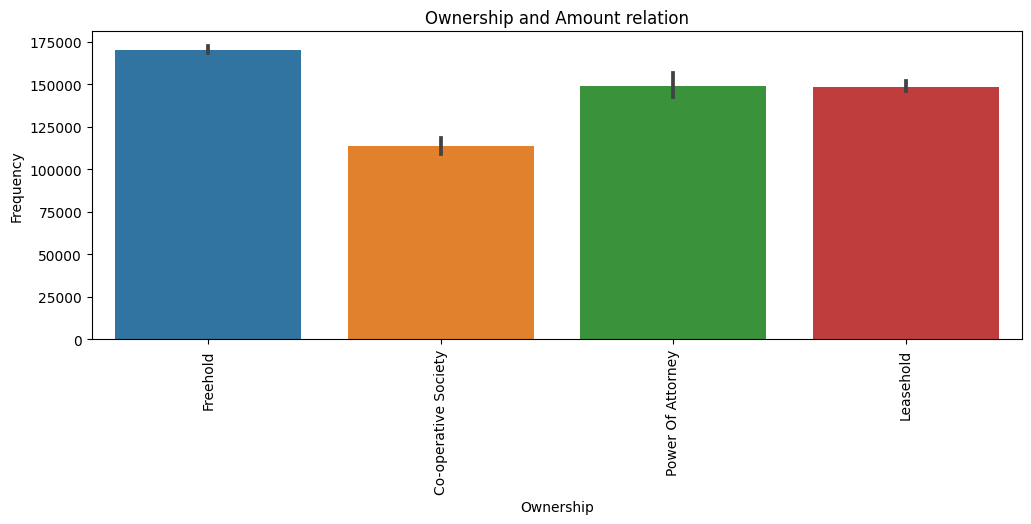

Ownership: 
 Ownership
Freehold                112227
Leasehold                 5285
Co-operative Society      3431
Power Of Attorney         1069
Name: count, dtype: int64


In [44]:
for n in categ_variables:
    bar_plot(n)

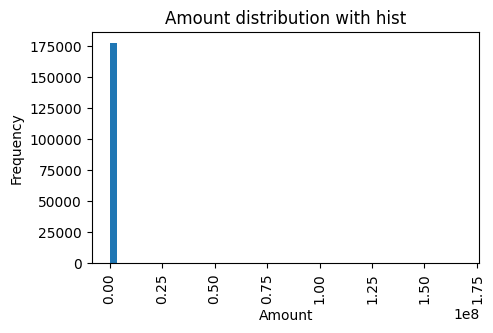

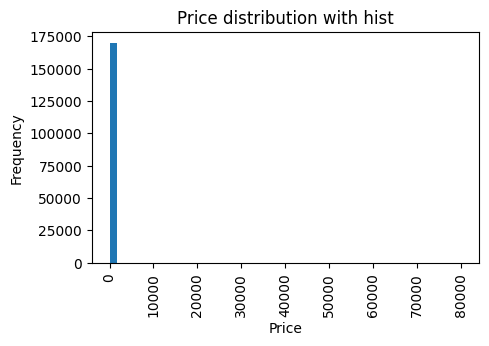

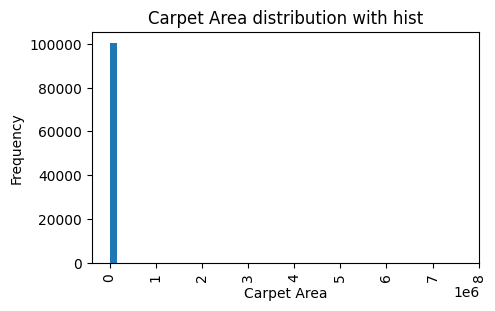

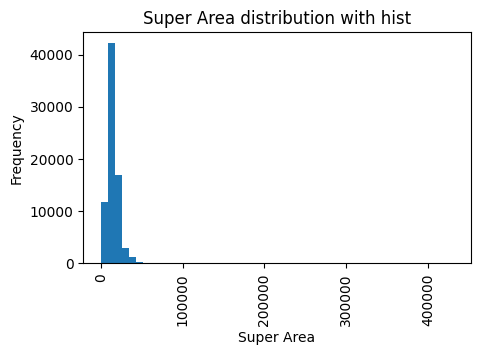

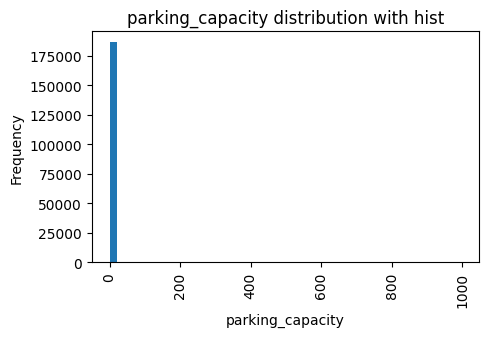

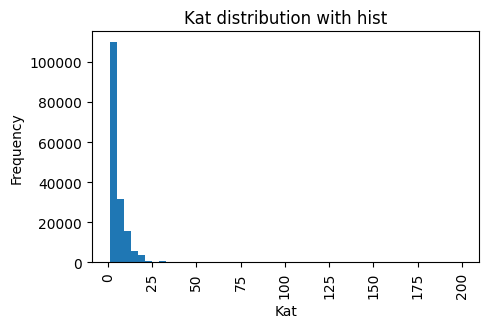

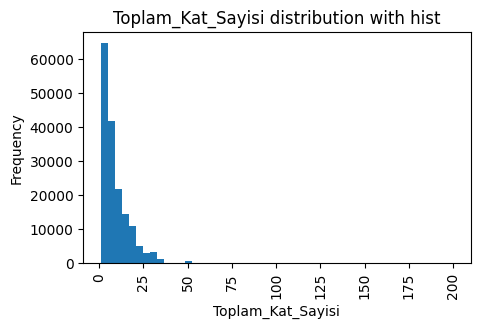

In [45]:
for n in non_categ_variables:
    plot_hist(n)

In [46]:
non_categ_variables = ["Amount","Price","Carpet Area","Super Area","parking_capacity","Kat","Toplam_Kat_Sayisi"]
categ_variables = ['location', 'parking_covered',"Transaction" ,"Furnishing","facing","Bathroom","Balcony","Ownership"] #bar plot

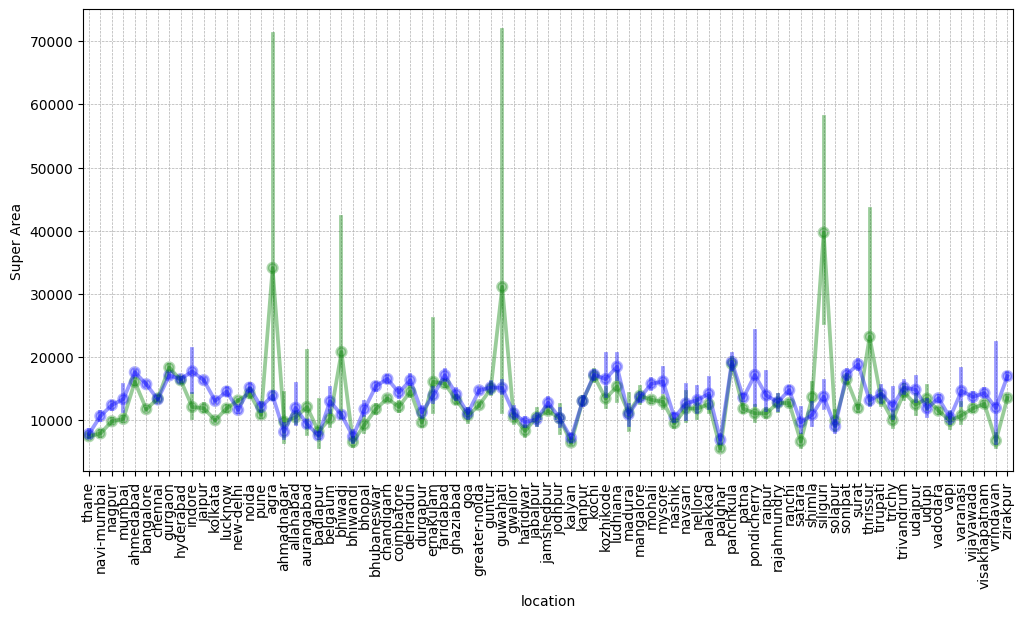

In [47]:

f, ax = plt.subplots(figsize=(12, 6))

pointplot1 = sns.pointplot(data=data, x="location", y="Carpet Area", color="green", ax=ax)
pointplot2 = sns.pointplot(data=data, x="location", y="Super Area", color="blue", ax=ax)

plt.setp(pointplot2.lines, alpha=0.4)
plt.setp(pointplot2.collections, alpha=0.3)  # Markers için

plt.xticks(rotation=90)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [48]:

def plot_pie_for_all_columns(data):
    for column in categ_variables:
        labels = data[column].value_counts().index
        sizes = data[column].value_counts().values
        explode = [0] * len(sizes)
        
        plt.figure(figsize=(5, 5))
        plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
        plt.title(column, color='blue', fontsize=15)
        plt.show()
        print("\n\n\n")

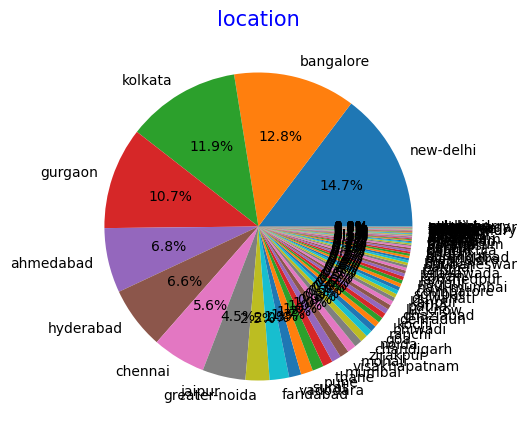

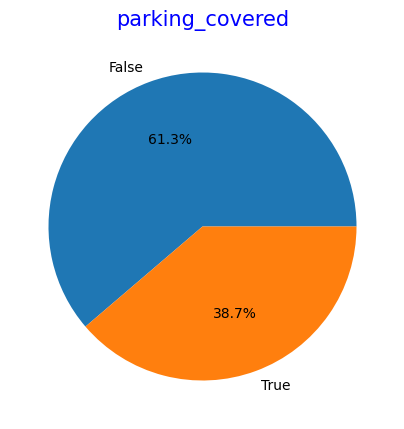

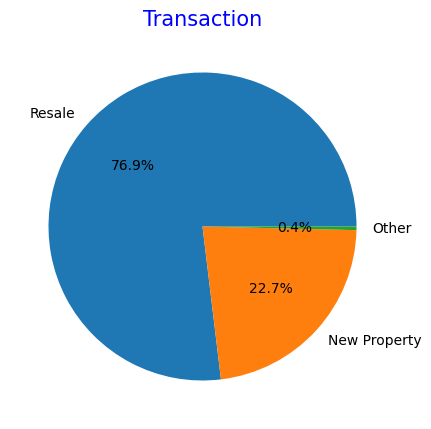

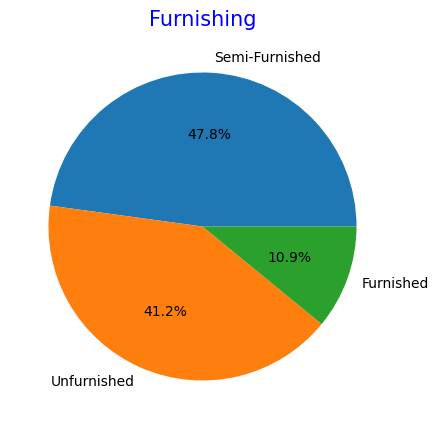

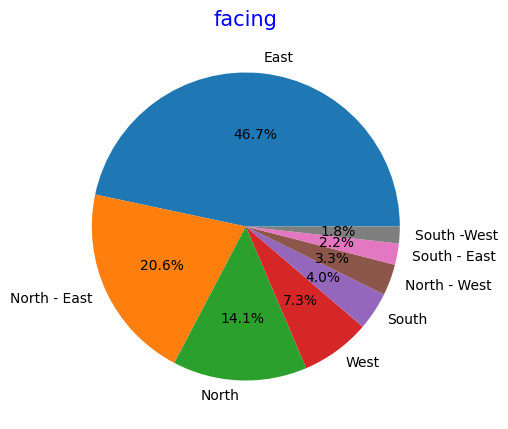

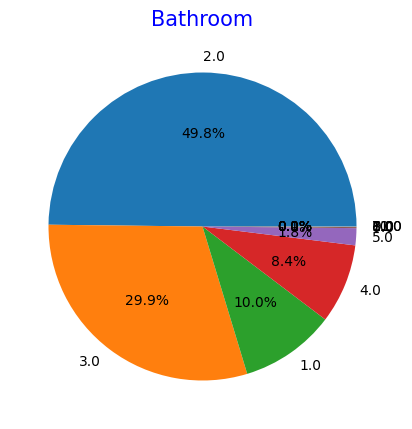

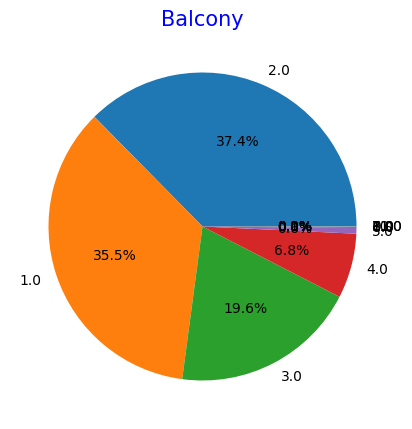

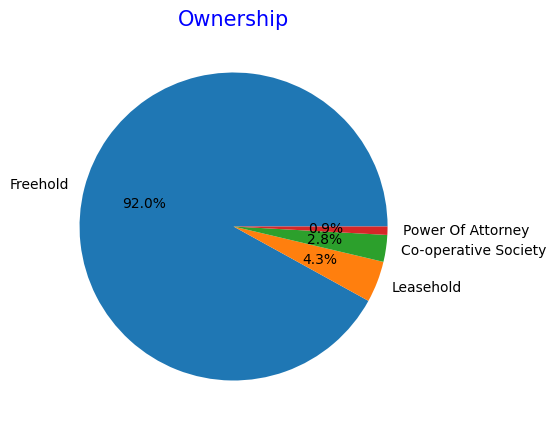

In [49]:
plot_pie_for_all_columns(data)

<a id ="6"></a>
# Data Filling


In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


numeric_data = data.select_dtypes(include=[np.number])
numeric_data_filled = numeric_data.fillna(0)

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_filled)

model = Sequential()
model.add(Dense(64, activation='leaky_relu', input_shape=(numeric_data_scaled.shape[1],)))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(numeric_data_scaled.shape[1],activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(numeric_data_scaled, numeric_data_scaled, epochs=50, batch_size=256, validation_split=0.1)

numeric_data_imputed = model.predict(numeric_data_scaled)
numeric_data_filled.loc[:, numeric_data.columns] = numeric_data_imputed
data.loc[:, numeric_data.columns] = scaler.inverse_transform(numeric_data_filled)

2024-07-19 18:17:06.643383: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 18:17:06.643520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 18:17:06.793723: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1810 - val_loss: 0.1841
Epoch 2/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0233 - val_loss: 0.1422
Epoch 3/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0058 - val_loss: 0.4868
Epoch 4/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0659 - val_loss: 0.2753
Epoch 5/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0238 - val_loss: 0.0968
Epoch 6/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133 - val_loss: 0.0548
Epoch 7/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0025 - val_loss: 0.1854
Epoch 8/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0153 - val_loss: 0.1311
Epoch 9/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038 - val_loss: 0.2616
Epoch 10/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - val_loss: 0.0458
Epoch 11/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032 - val_loss: 0.0886
Epoch 12/50
660/660 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [51]:
data.Furnishing.value_counts()

Furnishing
Semi-Furnished    88316
Unfurnished       76154
Furnished         20162
Name: count, dtype: int64

In [52]:
import pandas as pd
import numpy as np


non_numeric_columns = ['Transaction', 'Furnishing', 'facing', 'Ownership']

for column in non_numeric_columns:
    missing = data[column].isnull()
    if missing.sum() > 0:
        values_counts = data[column].value_counts(normalize=True)
        fill_values = np.random.choice(values_counts.index, size=missing.sum(), p=values_counts.values)
        data.loc[missing, column] = fill_values

In [53]:
data.Furnishing.value_counts()

Furnishing
Semi-Furnished    89684
Unfurnished       77361
Furnished         20484
Name: count, dtype: int64

In [54]:
data.to_csv('updated_data_2.csv', index=False)
data = pd.read_csv("updated_data_2.csv")

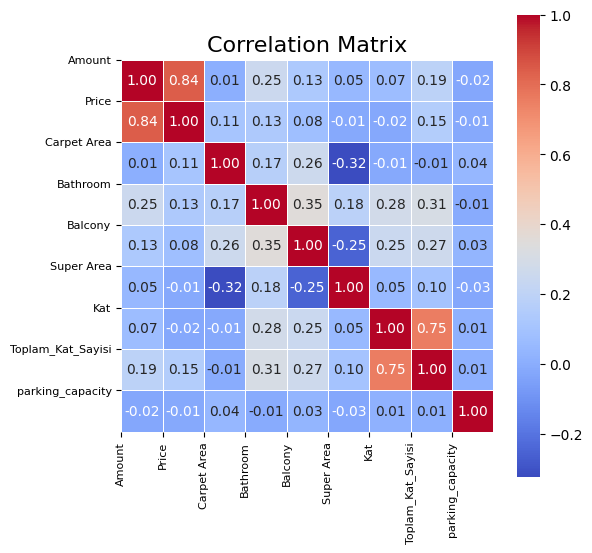

In [55]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

f = plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.7)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8, rotation=90)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [56]:
numeric_data = data.select_dtypes(include=[np.number])
non_num_data = data.select_dtypes(exclude=[np.number])

In [57]:
df = data.copy()

<a id ="7"></a>
# Encoding and Scaling for ML and DL

In [58]:
import pandas as pd
import category_encoders as ce
#1. Location Column (81 Unique Values)

# Frequency Encoding
freq_encoder = ce.CountEncoder()
df['location'] = freq_encoder.fit_transform(df['location'])

In [59]:
#2. Transaction Column (3 Unique Values)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Transaction'] = le.fit_transform(df['Transaction'])

In [60]:
#3. Furnishing Kolonu (3 Unique Values)

le = LabelEncoder()
df['Furnishing'] = le.fit_transform(df['Furnishing'])


In [61]:
#4. Facing Kolonu (8 Unique Values)

df_one_hot = pd.get_dummies(df, columns=['facing'])
le = LabelEncoder()
df['facing'] = le.fit_transform(df['facing'])

In [62]:
#5. Ownership Kolonu (4 Unique Values)

df_one_hot = pd.get_dummies(df, columns=['Ownership'])
le = LabelEncoder()
df['Ownership'] = le.fit_transform(df['Ownership'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187529 entries, 0 to 187528
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount             187529 non-null  float64
 1   Price              187529 non-null  float64
 2   location           187529 non-null  int64  
 3   Carpet Area        187529 non-null  float64
 4   Transaction        187529 non-null  int64  
 5   Furnishing         187529 non-null  int64  
 6   facing             187529 non-null  int64  
 7   Bathroom           187529 non-null  float64
 8   Balcony            187529 non-null  float64
 9   Ownership          187529 non-null  int64  
 10  Super Area         187529 non-null  float64
 11  Kat                187529 non-null  float64
 12  Toplam_Kat_Sayisi  187529 non-null  float64
 13  parking_covered    187529 non-null  bool   
 14  parking_capacity   187529 non-null  float64
dtypes: bool(1), float64(9), int64(5)
memory usage: 20.2

In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


numeric_columns = ['Amount', 'Price', 'Carpet Area', 'Bathroom', 'Balcony', 'Super Area', 'Kat', 'Toplam_Kat_Sayisi', 'parking_covered', 'parking_capacity']
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [65]:
df

,Amount,Price,location,Carpet Area,Transaction,Furnishing,facing,Bathroom,Balcony,Ownership,Super Area,Kat,Toplam_Kat_Sayisi,parking_covered,parking_capacity
0,0.047122,0.003617,1933,0.030419,2,2,7,0.119237,0.183252,1,0.410045,0.393799,0.418684,0.0,0.155319
1,0.047604,0.004469,1933,0.030317,2,1,0,0.206850,0.127965,1,0.410373,0.372007,0.448332,0.0,0.155691
2,0.047811,0.005611,1933,0.030853,2,2,0,0.206023,0.128684,1,0.409860,0.393562,0.465905,1.0,0.155550
3,0.046999,0.003014,1933,0.030338,2,2,2,0.118295,0.157871,1,0.409769,0.365438,0.397631,0.0,0.155101
4,0.047906,0.006043,1933,0.030715,2,2,7,0.205528,0.128640,0,0.409402,0.425505,0.499762,1.0,0.155922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187524,0.047329,0.003427,1530,0.029658,0,1,0,0.288113,0.210282,1,0.439375,0.368759,0.400942,1.0,0.155912
187525,0.047166,0.003277,1530,0.029480,2,2,2,0.289866,0.128380,1,0.435727,0.375235,0.405213,1.0,0.155807
187526,0.047366,0.003690,1530,0.031663,2,0,0,0.288701,0.182960,1,0.409952,0.365786,0.397969,1.0,0.155725
187527,0.047047,0.003379,1530,0.029574,2,1,0,0.204404,0.128528,1,0.420939,0.369010,0.395689,0.0,0.155295


In [66]:
df2 = df.copy()

<a id ="8"></a>
# Machine Learning and Deep Learning Methods

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df.drop("location",axis=1,inplace=True)
for each in df.columns:
    
    X = df.drop(columns=each)
    y = df[each]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Label Name: {each}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("\n")
    
df = df2.copy()

Label Name: Amount
Mean Squared Error: 2.8092541592425536e-07
R-squared: 0.931162370494132


Label Name: Price
Mean Squared Error: 9.672505088059642e-07
R-squared: 0.8827837279007874


Label Name: Carpet Area
Mean Squared Error: 2.417755871056285e-05
R-squared: 0.15619779069990092


Label Name: Transaction
Mean Squared Error: 0.6230489824861064
R-squared: 0.11541459524849873


Label Name: Furnishing
Mean Squared Error: 0.4164944335818571
R-squared: 0.028001434974622375


Label Name: facing
Mean Squared Error: 4.295075585309874
R-squared: 0.009516807896845836


Label Name: Bathroom
Mean Squared Error: 0.0042066763662579
R-squared: 0.251705333654346


Label Name: Balcony
Mean Squared Error: 0.0007404555328740737
R-squared: 0.31085604867483174


Label Name: Ownership
Mean Squared Error: 0.10644733585785535
R-squared: 0.012939131026951434


Label Name: Super Area
Mean Squared Error: 0.00015863053423303177
R-squared: 0.027822018375139868


Label Name: Kat
Mean Squared Error: 8.7422346711762

In [68]:
df = df2.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187529 entries, 0 to 187528
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Amount             187529 non-null  float64
 1   Price              187529 non-null  float64
 2   location           187529 non-null  int64  
 3   Carpet Area        187529 non-null  float64
 4   Transaction        187529 non-null  int64  
 5   Furnishing         187529 non-null  int64  
 6   facing             187529 non-null  int64  
 7   Bathroom           187529 non-null  float64
 8   Balcony            187529 non-null  float64
 9   Ownership          187529 non-null  int64  
 10  Super Area         187529 non-null  float64
 11  Kat                187529 non-null  float64
 12  Toplam_Kat_Sayisi  187529 non-null  float64
 13  parking_covered    187529 non-null  float64
 14  parking_capacity   187529 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 21.5 MB


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

df = df2.copy()
df.drop("location",axis=1,inplace=True)

for each in df.columns:
    
    X = df.drop(columns=[each])
    y = df[each]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    y_pred_linear = model_linear.predict(X_test)

    poly = PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model_poly = LinearRegression()
    model_poly.fit(X_poly_train, y_train)
    y_pred_poly = model_poly.predict(X_poly_test)

    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f'Label Name: {each}')
    print(f'Linear Regression - Mean Squared Error: {mse_linear}')
    print(f'Linear Regression - R-squared: {r2_linear}')
    print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
    print(f'Polynomial Regression - R-squared: {r2_poly}')
    print("\n")
df = df2.copy()

Label Name: Amount
Linear Regression - Mean Squared Error: 2.8092541592425536e-07
Linear Regression - R-squared: 0.931162370494132
Polynomial Regression - Mean Squared Error: 3.92746125035132e-07
Polynomial Regression - R-squared: 0.9037619570444163


Label Name: Price
Linear Regression - Mean Squared Error: 9.672505088059642e-07
Linear Regression - R-squared: 0.8827837279007874
Polynomial Regression - Mean Squared Error: 7.463946974708692e-07
Polynomial Regression - R-squared: 0.909548143779053


Label Name: Carpet Area
Linear Regression - Mean Squared Error: 2.417755871056285e-05
Linear Regression - R-squared: 0.15619779069990092
Polynomial Regression - Mean Squared Error: 1.0497422743501542e-05
Polynomial Regression - R-squared: 0.6336375972048047


Label Name: Transaction
Linear Regression - Mean Squared Error: 0.6230489824861064
Linear Regression - R-squared: 0.11541459524849873
Polynomial Regression - Mean Squared Error: 0.6194959983931223
Polynomial Regression - R-squared: 0.120

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = data.copy()
y = df['Transaction']
df_encoded = pd.get_dummies(df.drop(columns=['Transaction']), columns=['location', 'Furnishing', 'facing', 'Ownership'])
X = df_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

df = data.copy()

Accuracy: 0.7611315522849678
              precision    recall  f1-score   support

New Property       0.31      0.03      0.05      8551
       Other       0.00      0.00      0.00       132
      Resale       0.77      0.98      0.86     28823

    accuracy                           0.76     37506
   macro avg       0.36      0.34      0.30     37506
weighted avg       0.66      0.76      0.67     37506



In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = data.copy()
y = df['Transaction']
df_encoded = pd.get_dummies(df.drop(columns=['Transaction']), columns=['location', 'Furnishing', 'facing', 'Ownership'])
dependent_variables = ['Transaction', 'Furnishing', 'facing', 'Ownership']

for var in dependent_variables:
    
    y = df[var]
    if var== "Transaction":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Furnishing', 'facing', 'Ownership'])
    if var== "Furnishing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'facing', 'Ownership'])
    if var== "facing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'Ownership'])
    if var== "Ownership":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'facing'])        
    
    X = df_encoded
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Variable: {var}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print('\n')
    df = data.copy()


Variable: Transaction
Accuracy: 0.7611315522849678
              precision    recall  f1-score   support

New Property       0.31      0.03      0.05      8551
       Other       0.00      0.00      0.00       132
      Resale       0.77      0.98      0.86     28823

    accuracy                           0.76     37506
   macro avg       0.36      0.34      0.30     37506
weighted avg       0.66      0.76      0.67     37506



Variable: Furnishing
Accuracy: 0.4785634298512238
                precision    recall  f1-score   support

     Furnished       0.25      0.00      0.00      4086
Semi-Furnished       0.48      0.98      0.65     18025
   Unfurnished       0.33      0.02      0.04     15395

      accuracy                           0.48     37506
     macro avg       0.36      0.33      0.23     37506
  weighted avg       0.40      0.48      0.33     37506



Variable: facing
Accuracy: 0.45008798592225246
              precision    recall  f1-score   support

        East     

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = df2.copy()
df.drop("location",axis=1,inplace=True)

X = df.drop(columns=['Price']) 
y = df['Price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 7.673695599879455e-06
R-squared (R2): 0.07006304648794759


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = data.copy()
df_encoded = pd.get_dummies(df, columns=['location', 'Transaction', 'Furnishing', 'facing', 'Ownership'])
numeric_columns = ['Amount', 'Price', 'Carpet Area', 'Bathroom', 'Balcony', 'Super Area', 'Kat', 'Toplam_Kat_Sayisi', 'parking_covered', 'parking_capacity']

for col in numeric_columns:
    
    print(f"*** {col} KNN Regression for Column ***")
    
    X = df_encoded.drop(columns=[col])
    y = df_encoded[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")

*** Amount KNN Regression for Column ***
RMSE: 232323.4067827677
R2 Score: 0.536934440973724


*** Price KNN Regression for Column ***
RMSE: 119.73593451549166
R2 Score: 0.5503865342721534


*** Carpet Area KNN Regression for Column ***
RMSE: 25813.323899605024
R2 Score: 0.4921981174366288


*** Bathroom KNN Regression for Column ***
RMSE: 0.4404068849682915
R2 Score: 0.7518011747649064


*** Balcony KNN Regression for Column ***
RMSE: 0.631582671884309
R2 Score: 0.7292616275178023


*** Super Area KNN Regression for Column ***
RMSE: 5057.75492386359
R2 Score: 0.6859643084069347


*** Kat KNN Regression for Column ***
RMSE: 2.1273437686792813
R2 Score: 0.8001364846575337


*** Toplam_Kat_Sayisi KNN Regression for Column ***
RMSE: 3.0967176593791854
R2 Score: 0.8481578492652528


*** parking_covered KNN Regression for Column ***
RMSE: 0.2567013635314918
R2 Score: 0.7217255057652134


*** parking_capacity KNN Regression for Column ***
RMSE: 13.658002874256278
R2 Score: 0.5239672591380773

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

df = data.copy()

df_encoded = pd.get_dummies(df, columns=['location', 'Furnishing', 'facing', 'Ownership'], drop_first=True)
y = df_encoded['Transaction']
X = df_encoded.drop(columns=['Transaction', 'Amount'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.6528555431131019
              precision    recall  f1-score   support

New Property       0.44      0.37      0.40      8551
       Other       0.03      0.98      0.06       132
      Resale       0.81      0.73      0.77     28823

    accuracy                           0.65     37506
   macro avg       0.43      0.69      0.41     37506
weighted avg       0.72      0.65      0.68     37506



In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

df = data.copy()

df_encoded = pd.get_dummies(df.drop(columns=['Transaction']), columns=['location', 'Furnishing', 'facing', 'Ownership'])
dependent_variables = ['Transaction', 'Furnishing', 'facing', 'Ownership']

for var in dependent_variables:
    y = df[var]
    if var== "Transaction":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Furnishing', 'facing', 'Ownership'])
    if var== "Furnishing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'facing', 'Ownership'])
    if var== "facing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'Ownership'])
    if var== "Ownership":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'facing'])        

    X = df_encoded
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Variable: {var}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print('\n')
    
    df = data.copy()

Variable: Transaction
Accuracy: 0.60904921879166
              precision    recall  f1-score   support

New Property       0.57      0.07      0.13      8551
       Other       0.02      0.98      0.03       132
      Resale       0.78      0.77      0.77     28823

    accuracy                           0.61     37506
   macro avg       0.46      0.61      0.31     37506
weighted avg       0.73      0.61      0.62     37506



Variable: Furnishing
Accuracy: 0.47795019463552496
                precision    recall  f1-score   support

     Furnished       0.26      0.00      0.00      4086
Semi-Furnished       0.48      0.97      0.64     18025
   Unfurnished       0.41      0.03      0.06     15395

      accuracy                           0.48     37506
     macro avg       0.38      0.33      0.24     37506
  weighted avg       0.43      0.48      0.33     37506



Variable: facing
Accuracy: 0.22905668426385112
              precision    recall  f1-score   support

        East      

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = data.copy()

df_encoded = pd.get_dummies(df.drop(columns=['Transaction']), columns=['location', 'Furnishing', 'facing', 'Ownership'])
dependent_variables = ['Transaction', 'Furnishing', 'facing', 'Ownership']

for var in dependent_variables:
    
    y = df[var]
    if var== "Transaction":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Furnishing', 'facing', 'Ownership'])
    if var== "Furnishing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'facing', 'Ownership'])
    if var== "facing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'Ownership'])
    if var== "Ownership":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'facing'])        
    
    X = df_encoded
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Variable: {var}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print('\n')
    
    df = data.copy()

Variable: Transaction
Accuracy: 0.9179331306990881
              precision    recall  f1-score   support

New Property       0.82      0.83      0.82      8551
       Other       0.94      0.93      0.94       132
      Resale       0.95      0.95      0.95     28823

    accuracy                           0.92     37506
   macro avg       0.90      0.90      0.90     37506
weighted avg       0.92      0.92      0.92     37506



Variable: Furnishing
Accuracy: 0.8162693968964966
                precision    recall  f1-score   support

     Furnished       0.65      0.64      0.64      4086
Semi-Furnished       0.85      0.85      0.85     18025
   Unfurnished       0.82      0.83      0.82     15395

      accuracy                           0.82     37506
     macro avg       0.77      0.77      0.77     37506
  weighted avg       0.82      0.82      0.82     37506



Variable: facing
Accuracy: 0.6389910947581721
              precision    recall  f1-score   support

        East      

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = data.copy()
df_encoded = pd.get_dummies(df.drop(columns=['Transaction']), columns=['location', 'Furnishing', 'facing', 'Ownership'])
dependent_variables = ['Transaction', 'Furnishing', 'facing', 'Ownership']

for var in dependent_variables:
    y = df[var]
    if var== "Transaction":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Furnishing', 'facing', 'Ownership'])
    if var== "Furnishing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'facing', 'Ownership'])
    if var== "facing":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'Ownership'])
    if var== "Ownership":
        df_encoded = pd.get_dummies(df.drop(columns=[var]), columns=['location', 'Transaction', 'Furnishing', 'facing'])        

    X = df_encoded
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Variable: {var}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print('\n')
    
    df = data.copy()

Variable: Transaction
Accuracy: 0.9452887537993921
              precision    recall  f1-score   support

New Property       0.95      0.80      0.87      8551
       Other       1.00      0.92      0.96       132
      Resale       0.94      0.99      0.97     28823

    accuracy                           0.95     37506
   macro avg       0.96      0.90      0.93     37506
weighted avg       0.95      0.95      0.94     37506



Variable: Furnishing
Accuracy: 0.849624060150376
                precision    recall  f1-score   support

     Furnished       0.94      0.57      0.71      4086
Semi-Furnished       0.86      0.89      0.87     18025
   Unfurnished       0.83      0.88      0.85     15395

      accuracy                           0.85     37506
     macro avg       0.87      0.78      0.81     37506
  weighted avg       0.85      0.85      0.85     37506



Variable: facing
Accuracy: 0.6907694768836986
              precision    recall  f1-score   support

        East       

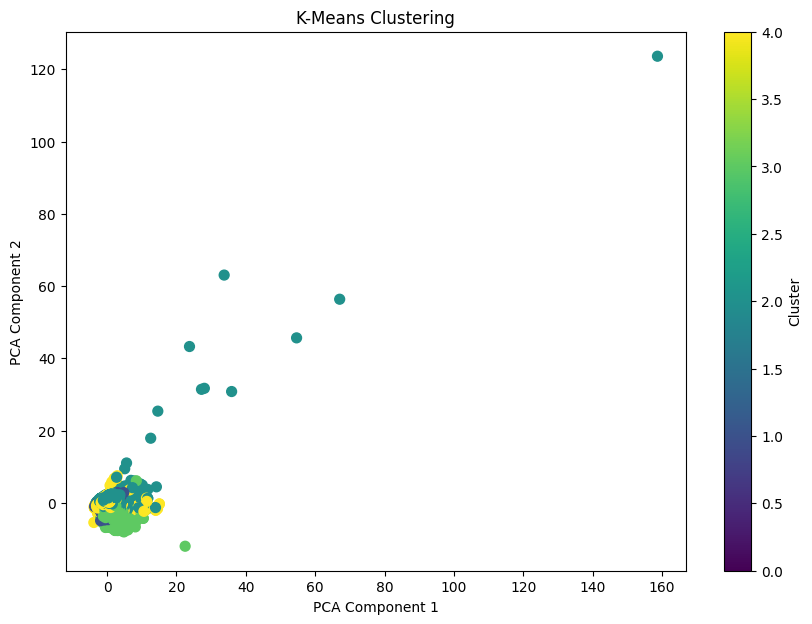

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = data.copy()
df_encoded = pd.get_dummies(df, columns=['location', 'Transaction', 'Furnishing', 'facing', 'Ownership'], drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

cluster_labels = kmeans.labels_
df_encoded['Cluster'] = cluster_labels
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = df2.copy()

X = df.drop(columns=['Price']) 
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae']) 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=12, verbose=1)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):",mse)
print("R-squared (R2) Score:", r2)


Epoch 1/100
12502/12502 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.0146 - mae: 0.0187 - mse: 0.0146 - val_loss: 2.3738e-05 - val_mae: 0.0039 - val_mse: 2.3738e-05
Epoch 2/100
12502/12502 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.7145e-04 - mae: 0.0041 - mse: 1.7145e-04 - val_loss: 2.3738e-05 - val_mae: 0.0039 - val_mse: 2.3738e-05
Epoch 3/100
12502/12502 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.0134e-04 - mae: 0.0040 - mse: 1.0134e-04 - val_loss: 2.3738e-05 - val_mae: 0.0039 - val_mse: 2.3738e-05
Epoch 4/100
12502/12502 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 5.9811e-05 - mae: 0.0040 - mse: 5.9811e-05 - val_loss: 2.3738e-05 - val_mae: 0.0039 - val_mse: 2.3738e-05
Epoch 5/100
12502/12502 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 2.6223e-05 - mae: 0.0039 - mse: 2.6223e-05 - val_loss: 2.3738e-05 - val_mae: 0.0039 - val_mse: 2.3738e-05
Epoch 6/100
12502/12502 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 2.2216e-05 - mae: 0.0039 - mse: 2.2216e-05 - val_loss: 2.3738e-05 - val_mae: 0.003

Epoch 1/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2245 - val_loss: 0.0172
Epoch 2/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0830 - val_loss: 0.0077
Epoch 3/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0304 - val_loss: 0.0059
Epoch 4/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0337 - val_loss: 0.0061
Epoch 5/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0140 - val_loss: 0.0075
Epoch 6/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0099 - val_loss: 0.0264
Epoch 7/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1835 - val_loss: 0.0066
Epoch 8/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0862 - val_loss: 0.0078
Epoch 9/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - val_loss: 0.0084
Epoch 10/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0547 - val_loss: 0.0054
Epoch 11/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090 - val_loss: 0.0121
Epoch 12/50
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

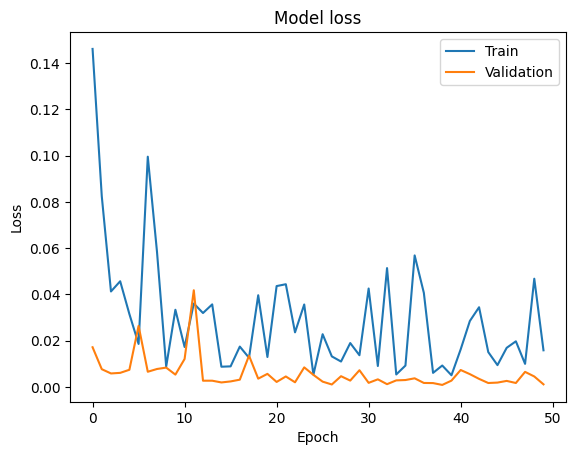

1173/1173 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU


numeric_data = data.select_dtypes(include=[np.number])
numeric_data_filled = numeric_data.fillna(0)
train_data, test_data = train_test_split(numeric_data_filled, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

model = Sequential()
model.add(Dense(64, input_shape=(train_data_scaled.shape[1],)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(train_data_scaled.shape[1], activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_data_scaled, train_data_scaled, epochs=50, batch_size=256, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

test_data_imputed = model.predict(test_data_scaled)
test_data_filled = pd.DataFrame


In [81]:
df.drop("location",axis=1,inplace=True)


In [82]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Epoch 1/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0143
Epoch 2/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0022
Epoch 3/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 7.7871e-04
Epoch 4/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0015
Epoch 5/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 2.2228e-04
Epoch 6/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 1.1058e-04
Epoch 7/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 4.8521e-05
Epoch 8/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.8535e-05
Epoch 9/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 4.2529e-04
Epoch 10/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.0010
Epoch 11/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 4.7826e-05
Epoch 12/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 6.8513e-05
Epoch 13/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 3.0167e-05
Epoch 14/50
4689/4689 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms